# Exercise 6: Visualization

Ejercicio de visualización, se generará una gráfica de nodos aleatorios

In [1]:
using Random, Graphs, Plots, LinearAlgebra, FileIO, Images

Se coloca una semilla para los números aleatorios usados

In [2]:
# Semilla generadora
Random.seed!(3915)


TaskLocalRNG()

Se construye un grafo especificando la cantidad de nodos y la máxima distancia a la cual podrán estar dos nodos para ser conectados

In [3]:
function create_graph(max_distance, points)
    graph = SimpleGraph(points)
    coordenates = [(rand(), rand()) for _ in 1:points]
    for i in 1:points, j in i+1:points
        if norm(coordenates[i] .- coordenates[j]) <= max_distance
            add_edge!(graph, i, j)
        end
    end
    return graph, coordenates
end

create_graph (generic function with 1 method)

In [4]:
graph, coordenates = create_graph(0.1, 315)
origin = (1, 1)
distances = [norm(origin .- c) for c in coordenates]
shortest_distances = dijkstra_shortest_paths(graph, argmin(distances))
nothing

Se obtienen los arrays con las coordenadas de cada punto y la distancia de los caminos más cortos

In [5]:
edge_values = shortest_distances.dists
x_coordenates = [c[1] for c in coordenates]
y_coordenates = [c[2] for c in coordenates]
nothing

Finalmente se grafica la figura guardándola como un archivo png en la carpeta fig y mostrándola con FileIO

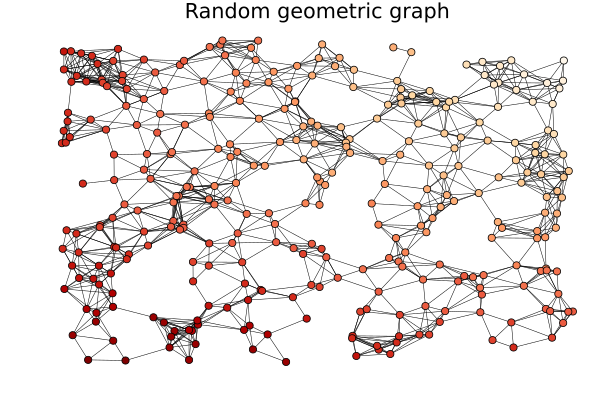

In [6]:
pl = plot(
title="Random geometric graph",
legend=false,
axis=false,
grid=false
)
for edge in edges(graph)
    plot!([coordenates[src(edge)][1], coordenates[dst(edge)][1]], [coordenates[src(edge)][2], coordenates[dst(edge)][2]], lw=0.5, color=:black)
end
scatter!(x_coordenates, y_coordenates, marker_z=edge_values, c=:OrRd_9)
path = pwd()
path = path[1:length(path)-3]
savefig(pl,"$path" * "fig/graph.png")
img = FileIO.load("$path" * "fig/graph.png")